In [1]:
# 6. Возраст и доход
# Исследование: как уровень дохода зависит от возраста
#     - В каком возрасте люди достигают наибольшего дохода
#     - Рассмотреть этот показатель отдельно для нескольких профессий

In [2]:
from dataframes import dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создание датафрейма

Составим список необходимых в работе столбцов

In [3]:
# Список нужных столбцов
columns_needed = ['age', 'occ10', 'realrinc']

Создаем пустой датафрейм для объединения

In [4]:
# Создаём пустой датафрейм для объединения
df = pd.DataFrame()

Отбираем нужные столбцы из каждого датафрейма

In [5]:
# Проходим по каждому датафрейму
for year, dd in dataframes.items():
    available_columns = [col for col in columns_needed if col in dd.columns]
    print(available_columns, year)
    if available_columns:
        temp_df = dd[available_columns].copy()
        temp_df['year'] = int(year)  # Добавляем год опроса
        df = pd.concat([df, temp_df], ignore_index=True)

['age', 'occ10', 'realrinc'] 2010
['age', 'occ10', 'realrinc'] 2012
['age', 'occ10', 'realrinc'] 2014
['age', 'occ10', 'realrinc'] 2016
['age', 'occ10', 'realrinc'] 2018
['age', 'occ10', 'realrinc'] 2021
['age', 'occ10', 'realrinc'] 2022


Отображение нового датафрейма и его размеров

In [6]:
# Проверяем результат
print("Размер нового датафрейма:", df.shape)
print("\nПервые 50 строк датафрейма:")
print(df.iloc[:50])

# Проверяем, какие столбцы в итоге есть
print("\nСтолбцы в новом датафрейме:", df.columns.tolist())

Размер нового датафрейма: (19952, 4)

Первые 50 строк датафрейма:
     age   occ10  realrinc  year
0   31.0   800.0   42735.0  2010
1   23.0   740.0    3885.0  2010
2   71.0  9120.0       NaN  2010
3   82.0     NaN       NaN  2010
4   78.0  6220.0       NaN  2010
5   40.0  8140.0    5827.5  2010
6   46.0   120.0   42735.0  2010
7   80.0  3600.0       NaN  2010
8   31.0   350.0       NaN  2010
9    NaN  3600.0       NaN  2010
10  31.0  4150.0   12302.5  2010
11  21.0     NaN       NaN  2010
12  58.0  4220.0   19425.0  2010
13  36.0     NaN       NaN  2010
14  57.0  4220.0       NaN  2010
15  28.0  4230.0       NaN  2010
16  80.0  5700.0       NaN  2010
17  84.0  8320.0       NaN  2010
18  51.0     NaN       NaN  2010
19  35.0  7420.0   42735.0  2010
20  49.0  6355.0   28490.0  2010
21  56.0  9140.0   28490.0  2010
22  88.0  8256.0       NaN  2010
23  23.0     NaN       NaN  2010
24  35.0   726.0   34965.0  2010
25  26.0   850.0   62160.0  2010
26  21.0     NaN       NaN  2010
27  21.0  

Для удобства меняем название столбца "occ10" на "occ":

In [7]:

df.rename(columns={'occ10':'occ'}, inplace=True)

Выведем на экран первые 50 строк датафрейма после переименования столбца:

In [8]:
print("\nПервые 50 строк датафрейма после переименования:")
print(df.iloc[:50])


Первые 50 строк датафрейма после переименования:
     age     occ  realrinc  year
0   31.0   800.0   42735.0  2010
1   23.0   740.0    3885.0  2010
2   71.0  9120.0       NaN  2010
3   82.0     NaN       NaN  2010
4   78.0  6220.0       NaN  2010
5   40.0  8140.0    5827.5  2010
6   46.0   120.0   42735.0  2010
7   80.0  3600.0       NaN  2010
8   31.0   350.0       NaN  2010
9    NaN  3600.0       NaN  2010
10  31.0  4150.0   12302.5  2010
11  21.0     NaN       NaN  2010
12  58.0  4220.0   19425.0  2010
13  36.0     NaN       NaN  2010
14  57.0  4220.0       NaN  2010
15  28.0  4230.0       NaN  2010
16  80.0  5700.0       NaN  2010
17  84.0  8320.0       NaN  2010
18  51.0     NaN       NaN  2010
19  35.0  7420.0   42735.0  2010
20  49.0  6355.0   28490.0  2010
21  56.0  9140.0   28490.0  2010
22  88.0  8256.0       NaN  2010
23  23.0     NaN       NaN  2010
24  35.0   726.0   34965.0  2010
25  26.0   850.0   62160.0  2010
26  21.0     NaN       NaN  2010
27  21.0  4130.0    1036.0

# Очистка данных

Проверка датафрейма на наличие пропусков

In [9]:
# Проверка на пропуски
print("Пропуски до очистки:")
print(df.isnull().sum())

Пропуски до очистки:
age          623
occ         1528
realrinc    8285
year           0
dtype: int64


Далее необходимо удалить все пропущенные значения в столбцах "age", "occ" и "realrinc", после чего проверяется размер датафрейма

In [10]:
# Удаление всех строк с NaN
cols_to_dropna = ['age', 'occ', 'realrinc']
df.dropna(subset=cols_to_dropna, inplace=True)
print('Размер датафрейма:', df.shape)

Размер датафрейма: (11094, 4)


В датафрейме осталось 11094 записи, что является достаточным количеством для проведения последующего анализа. После этого осуществляем проверку пропущенных и неопределенных значений в столбцах после очистки

In [11]:
# Проверка пропусков после очистки
print("Пропуски после очистки:")
print(df.isnull().sum())

Пропуски после очистки:
age         0
occ         0
realrinc    0
year        0
dtype: int64


Также отобразим ключевую информацию о датафрейме

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11094 entries, 0 to 19345
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       11094 non-null  float64
 1   occ       11094 non-null  float64
 2   realrinc  11094 non-null  float64
 3   year      11094 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 433.4 KB


Проверим данные на наличие выбросов. Начнем со столбца "realrinc", отображающего реальный доход человека после вычета налогов:

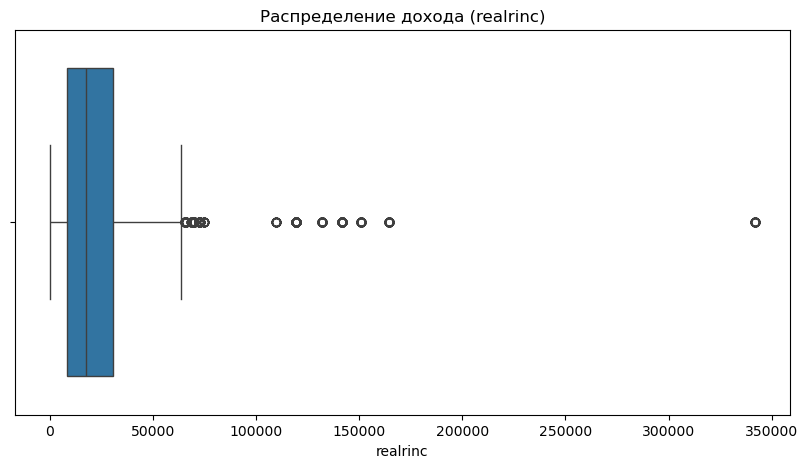

In [13]:
# Проверяем наличие выбросов в столбце "realrinc"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['realrinc'])
plt.title('Распределение дохода (realrinc)')
plt.show()

Такое распределение является вполне естественным, поскольку выборка допускает наличие в ней граждан, имеющих аномально высокий доход. Поэтому такие результаты следует интерпретировать не как выбросы, а как достоверные показатели заработной платы. Очистку проводить нецелесообразно.

Проверим столбец age (возраст) на наличие выбросов:

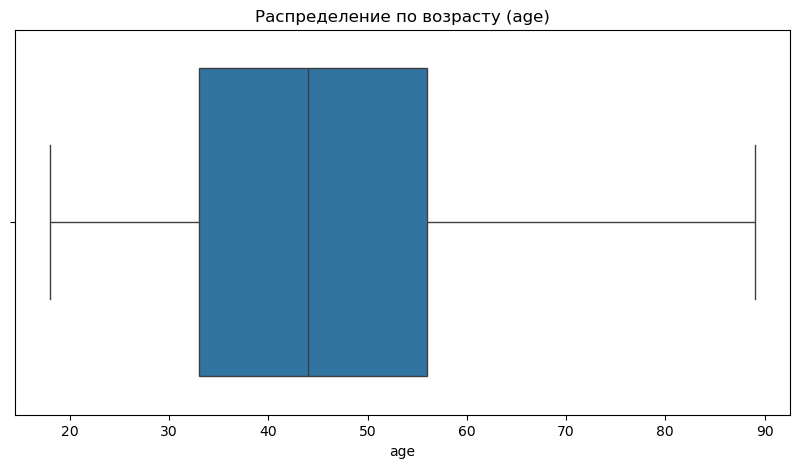

In [14]:
# Проверяем наличие выбросов в столбце "age"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['age'])
plt.title('Распределение по возрасту (age)')
plt.show()

В данном случае выбросы отсутствуют. Следовательно, очистка данных на этом этапе не требуется.

# Описательная статистика

Далее необходимо отобразить наиболее важные статистические показатели датафрейма. Для числовых переменных это будут: кол-во значений, минимум и максимум, среднее арифметическое, медиана, 1-й и 3-й квартили, а также среднекваратическое отклонение. Для категориальных переменных: кол-во всех значений, кол-во уникальных значений, мода и ее численность. Эти показатели необходимы для дальнейшего анализа данных и решения последующих задач. Также будет полезно узнать наиболее распространенные профессии в выборке, поскольку они пригодятся нам в будущем.

In [15]:
# Описательная статистика 

# Для числовых переменных
print("\nОписательная статистика числовых переменных:")
print(df[['age', 'realrinc']].describe())

# Для категориальной переменной (профессия)
print("\nУникальные значения профессий (occ):", df['occ'].nunique())
print(df['occ'].astype('category').describe())

# Наиболее популярные профессии
print("\nТоп-10 самых распространенных профессий:")
print(df['occ'].value_counts().head(10))


Описательная статистика числовых переменных:
                age       realrinc
count  11094.000000   11094.000000
mean      44.929602   25294.949274
std       14.494736   32161.714075
min       18.000000     204.500000
25%       33.000000    8417.500000
50%       44.000000   17550.000000
75%       56.000000   30645.000000
max       89.000000  341672.379300

Уникальные значения профессий (occ): 476
count     11094.0
unique      476.0
top        2310.0
freq        247.0
Name: occ, dtype: float64

Топ-10 самых распространенных профессий:
occ
2310.0    247
3255.0    245
4760.0    225
430.0     220
3600.0    219
9130.0    211
5240.0    202
4700.0    190
5700.0    178
4220.0    174
Name: count, dtype: int64


Промежуточные выводы:
1. Распределение по возрасту кажется относительно сбалансированным (средний возраст и медиана почти одинаковые), однако для точного определения степени симметрии необходимо визуализировать данные на гистограмме. Выборка включает все основные возрастные группы трудоспособного населения, что обеспечивает представительность анализа.
2. Доход предсказуемо имеет очень сильный разброс и большое стандартное отклонение. Медиана значительно ниже среднего, что свидетельствует о правосторонней асимметрии распределения.
3. Столбец "occ" содержит 476 уникальных профессий, при этом распределение этих профессий достаточно неравномерное.
4. В топ-10 наиболее распространенных профессий вошли: учитель, медицинский работник, продавец, повар, секретарь, грузчик, сотрудник службы поддержки клиентов, уборщик, водитель, кассир.

# Визуализация данных

Определим характер распределения числовых факторов датафрейма. Для столбца, отображающего возраст респондентов, строится обычная гистограмма с "гладкой" кривой плотности распределения. Что касается распределения доходов, то здесь логичным решением будет применить логарифмирование, поскольку в данных имеется сильный перекос.

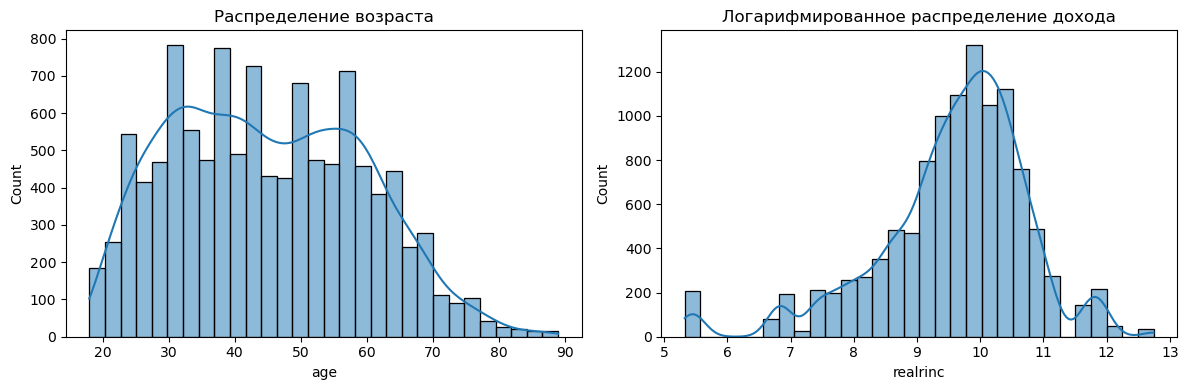

In [16]:
plt.figure(figsize=(12, 4))

# Распределение возраста
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возраста')

# Распределение дохода (логарифмическая шкала)
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['realrinc']), bins=30, kde=True)
plt.title('Логарифмированное распределение дохода');

plt.tight_layout()
plt.show();

Составим матрицу корреляций для выявления взаимосвязей между переменными:

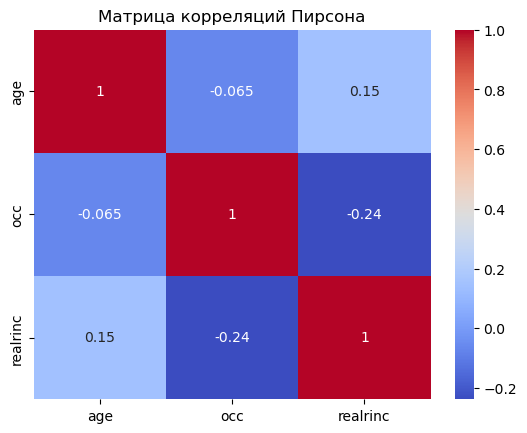

In [17]:
# Корреляционный анализ
sns.heatmap(df[['age', 'occ', 'realrinc']].corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Матрица корреляций Пирсона')
plt.show()

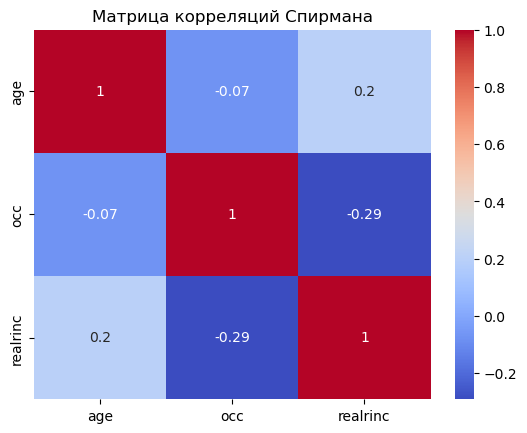

In [18]:
# Корреляционный анализ
sns.heatmap(df[['age', 'occ', 'realrinc']].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Матрица корреляций Спирмана')
plt.show()

# Анализ данных

<h3>1. В каком возрасте люди достигают наибольшего дохода</h3>

Создадим в датафрейме новый столбец, содержащий возрастной интервал, к которому относится респондент, с шагом 5 лет:

In [19]:
df['age_group'] = pd.cut(df['age'], bins=range(18, 91, 5), right=False)
df['age_group']

0        [28, 33)
1        [23, 28)
5        [38, 43)
6        [43, 48)
10       [28, 33)
           ...   
19335    [48, 53)
19336    [48, 53)
19343    [28, 33)
19344    [28, 33)
19345    [48, 53)
Name: age_group, Length: 11094, dtype: category
Categories (14, interval[int64, left]): [[18, 23) < [23, 28) < [28, 33) < [33, 38) ... [68, 73) < [73, 78) < [78, 83) < [83, 88)]

Сгруппируем данные по возрастным группам и найдем средний и медианный доходы в каждой из них:

In [20]:
realrinc_by_age = df.groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
realrinc_by_age

,age_group,mean,median
0,"[18, 23)",5414.926370,3386.000
1,"[23, 28)",11897.735156,9829.375
2,"[28, 33)",18994.262129,15372.500
3,"[33, 38)",23306.846622,18405.000
4,"[38, 43)",28175.428427,21060.000
5,"[43, 48)",31847.290097,21285.000
6,"[48, 53)",33052.441446,22495.000
7,"[53, 58)",31334.896306,21285.000
8,"[58, 63)",32170.210183,22050.000
9,"[63, 68)",27046.432810,18405.000


Визуализируем результат

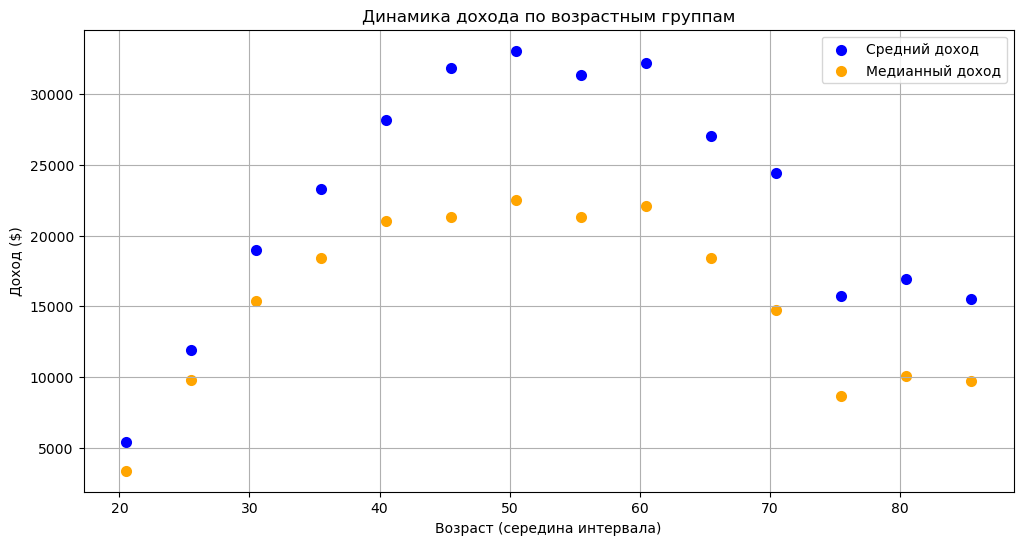

In [21]:
# Добавляем середину интервала для более наглядной визуализации
realrinc_by_age['age_mid'] = realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

# Строим график
plt.figure(figsize=(12, 6))
plt.scatter(realrinc_by_age['age_mid'], realrinc_by_age['mean'], label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(realrinc_by_age['age_mid'], realrinc_by_age['median'], label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();

Построим также столбчатую диаграмму по возрастным группам отдельно для среднего дохода:

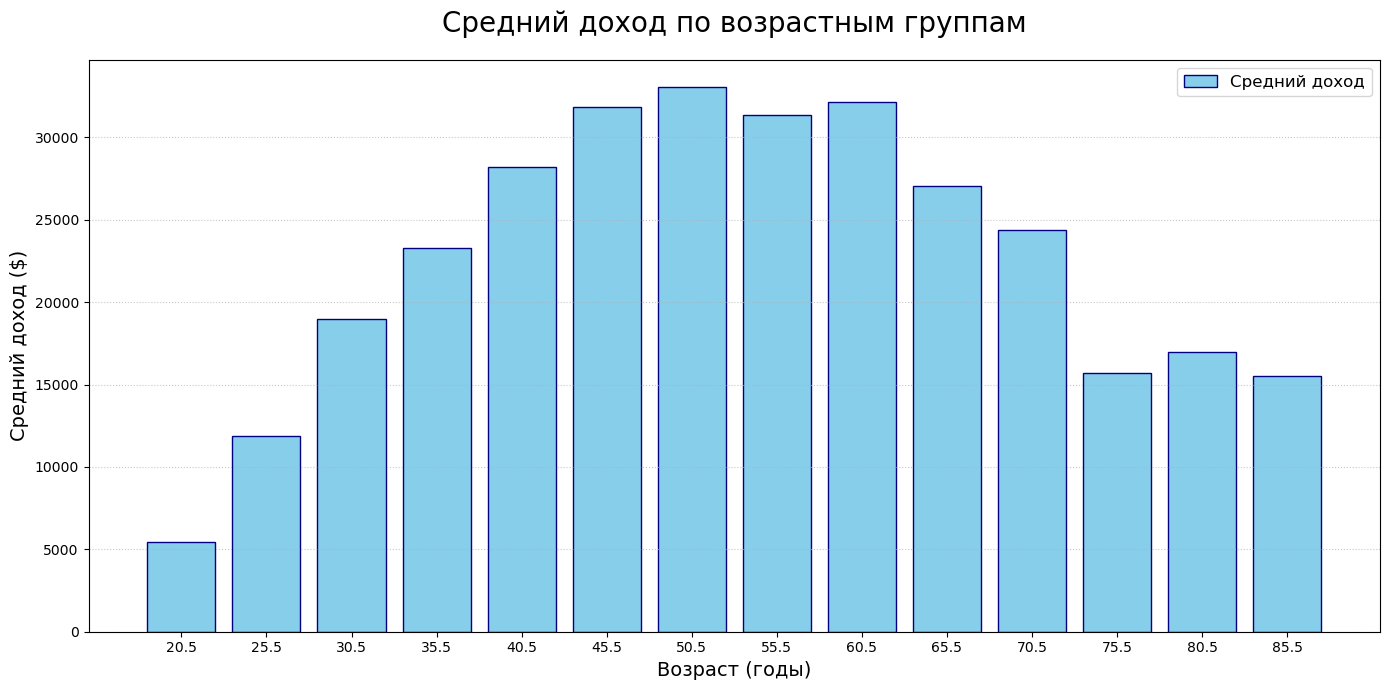

In [22]:
plt.figure(figsize=(14, 7))

bars = plt.bar(
    x=realrinc_by_age['age_mid'], height=realrinc_by_age['mean'], width=4,
    color='skyblue', edgecolor='navy', linewidth=1, label='Средний доход'
)

plt.title('Средний доход по возрастным группам', fontsize=20, pad=20)
plt.xlabel('Возраст (годы)', fontsize=14)
plt.ylabel('Средний доход ($)', fontsize=14)
plt.xticks(realrinc_by_age['age_mid'])
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

И для медианного дохода:

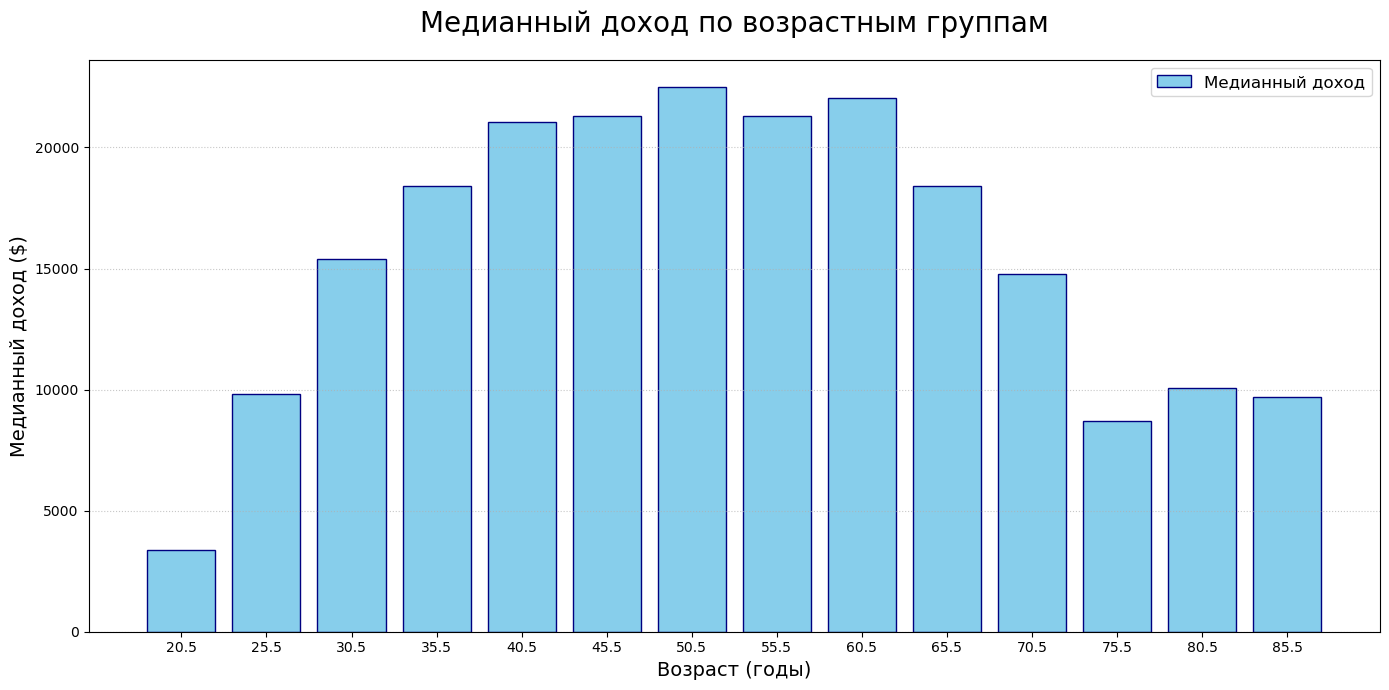

In [23]:
plt.figure(figsize=(14, 7))

bars = plt.bar(
    x=realrinc_by_age['age_mid'], height=realrinc_by_age['median'], width=4,
    color='skyblue', edgecolor='navy', linewidth=1, label='Медианный доход'
)

plt.title('Медианный доход по возрастным группам', fontsize=20, pad=20)
plt.xlabel('Возраст (годы)', fontsize=14)
plt.ylabel('Медианный доход ($)', fontsize=14)
plt.xticks(realrinc_by_age['age_mid'])
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Исходя из статистических показателей и графиков, можно сделать вывод, что явный рост как среднего, так и медианного доходов наблюдается в период с 18 до 53 лет. Возрастная группа 48-53 достигает пика доходности (средний доход - 33052 тыс. долларов, медианный - 22495 тыс. долларов). Затем происходит небольшой спад, а после этого вновь случается рост показателей доходности - это наблюдается в возрастной группе 58-63 года. Причинами такого поведения может быть наличие у респондентов инвестиций и другие накопленных активов, а также повышение этих людей до руководителей ввиду большого опыта работы и высокой квалификации. После возраста 58-63 лет происходит довольно резкий спад среднего и медианного доходов - вероятно, это обуславливается выходом респондентов на пенсию и гораздо меньшей востребованностью в своей сфере. 

<h3>2. В каком возрасте люди достигают наибольшего дохода в различных профессиях?</h3>

Далее рассмотрим 3 наиболее распространенных профессии из выборки и найдем для каждой из них возрастной промежуток, соответствующий наибольшему денежному доходу. Такими профессиями являются: учитель, медицинский работник и продавец.

Средний и медианный доходы по возрастным группами для учителя (код профессии - 2310):

In [24]:
teahcer_realrinc_by_age = df[df['occ'] == 2310].groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
teahcer_realrinc_by_age

,age_group,mean,median
0,"[18, 23)",3337.000000,2951.000
1,"[23, 28)",14872.445652,15210.000
2,"[28, 33)",20220.200000,21285.000
3,"[33, 38)",22634.062500,21870.000
4,"[38, 43)",23350.614865,22495.000
5,"[43, 48)",23014.545455,22495.000
6,"[48, 53)",26622.215909,27607.500
7,"[53, 58)",24065.762500,24997.500
8,"[58, 63)",22766.445652,22495.000
9,"[63, 68)",31167.329006,31927.500


Визуализируем результаты среднего дохода по возрастным группам для учителя:

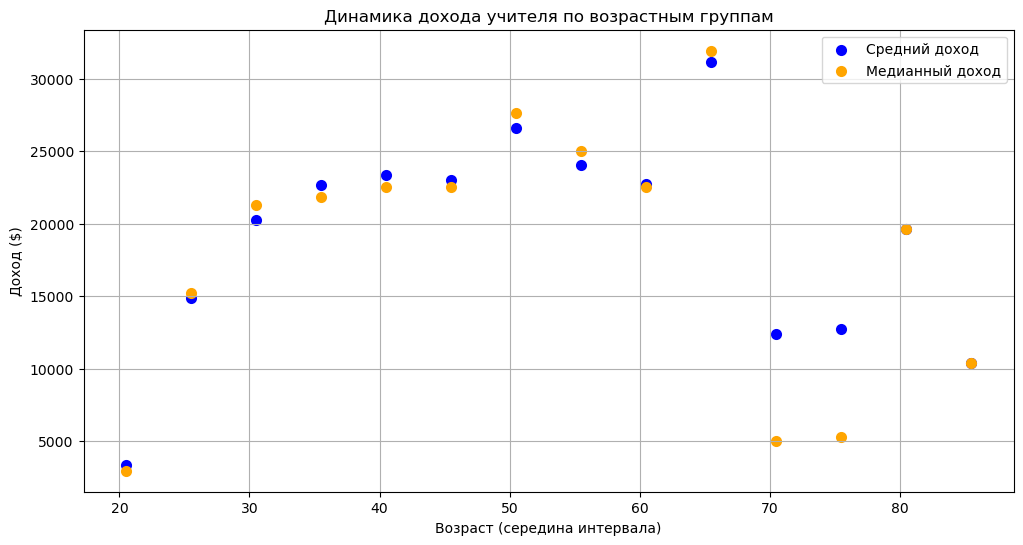

In [25]:
teahcer_realrinc_by_age['age_mid'] = teahcer_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(12, 6))
plt.scatter(teahcer_realrinc_by_age['age_mid'], teahcer_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(teahcer_realrinc_by_age['age_mid'], teahcer_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода учителя по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();

Исходя из полученных результатов, можно сказать, что в период 18-33 лет у учителей идет стремительный рост доходов, после чего в возрасте 33-63 лет этот показатель стабилизируется и выходит на плато. Довольно неожиданный пик случается в возрасте 63-68 лет - средняя доходность достигает 31 167 тыс. долларов, а медианная - 31 928 тыс. долларов. Причинами этого могут быть надбавки за трудовой стаж или повышение до административных должностей (директор, завуч и т.д.). После 68 лет уровень дохода резко падает - это связано с выходом на пенсию.

Средний и медианный доходы по возрастным группами для медицинского работника (код профессии - 3255):

In [26]:
medic_realrinc_by_age = df[df['occ'] == 3255].groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
medic_realrinc_by_age

,age_group,mean,median
0,"[18, 23)",872.000000,872.00
1,"[23, 28)",20097.666667,25740.00
2,"[28, 33)",26479.471154,28190.00
3,"[33, 38)",30499.347826,29430.00
4,"[38, 43)",37699.559937,31117.50
5,"[43, 48)",32408.833333,31286.25
6,"[48, 53)",36568.094296,33948.75
7,"[53, 58)",29693.196093,30645.00
8,"[58, 63)",29460.973684,31286.25
9,"[63, 68)",25773.678571,28518.75


Визуализируем результаты среднего дохода по возрастным группам для медицинского работника:

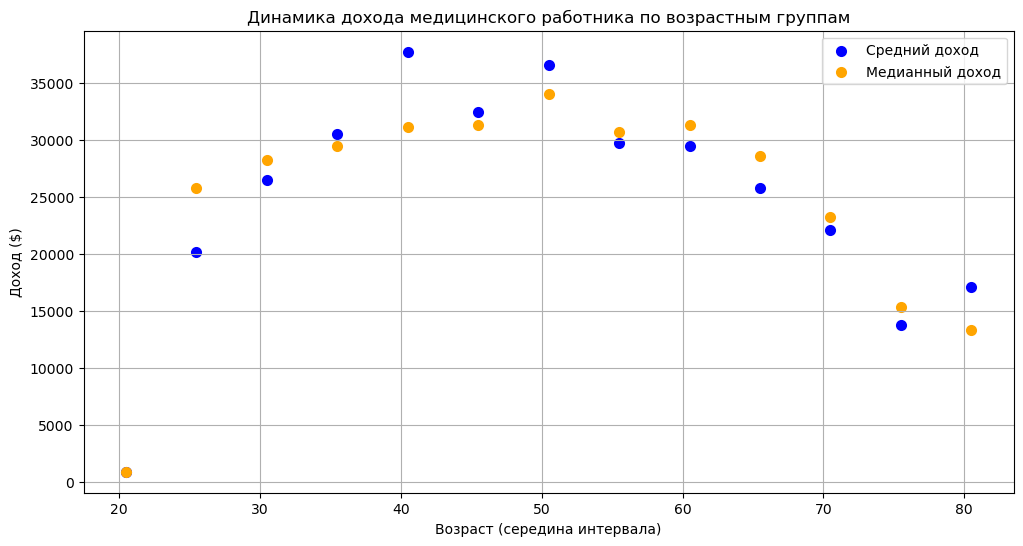

In [27]:
medic_realrinc_by_age['age_mid'] = medic_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(12, 6))
plt.scatter(medic_realrinc_by_age['age_mid'], medic_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(medic_realrinc_by_age['age_mid'], medic_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода медицинского работника по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();

В начале медицинской карьеры наблюдается весьма низкий уровень доходности, поскольку медицинские работники зачастую являются еще студентами или интернами. Далее случается интенсивный рост заработков в 23-28 лет - это объясняется переходом к полноценной медицинской практике. Максимальный доход наблюдается в возрастной группе 38-43 лет - средний его показатель составляет 37 700 тыс. долларов, а медианный - 31 118 тыс. долларов. В этом возрасте особенно четко заметен разрыв между этими двумя характеристиками - вероятно, это связано с наличием узких специалистов и высокооплачиваемостью некоторых отдельных категорий врачей (например, хирургов), а также с разницей в оплате между госучреждениями и частными клиниками. Далее доходы снижаются и вновь повышаются до почти аналогичного уровня, а затем - после 53 лет - начинают плавно уменьшаться, хотя при этом продолжают оставаться довольно высокими.

Средний и медианный доходы по возрастным группами для продавца (код профессии - 4760):

In [28]:
seller_realrinc_by_age = df[df['occ'] == 4760].groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
seller_realrinc_by_age

,age_group,mean,median
0,"[18, 23)",3789.796296,2951.000
1,"[23, 28)",9307.267857,6503.750
2,"[28, 33)",12153.865385,7930.625
3,"[33, 38)",37526.042325,17025.000
4,"[38, 43)",23427.217155,18997.500
5,"[43, 48)",30550.126109,14755.000
6,"[48, 53)",8489.000000,7377.500
7,"[53, 58)",15619.043478,11637.500
8,"[58, 63)",12934.340909,10355.000
9,"[63, 68)",14832.050000,12203.750


Визуализируем результаты среднего дохода по возрастным группам для продавца:

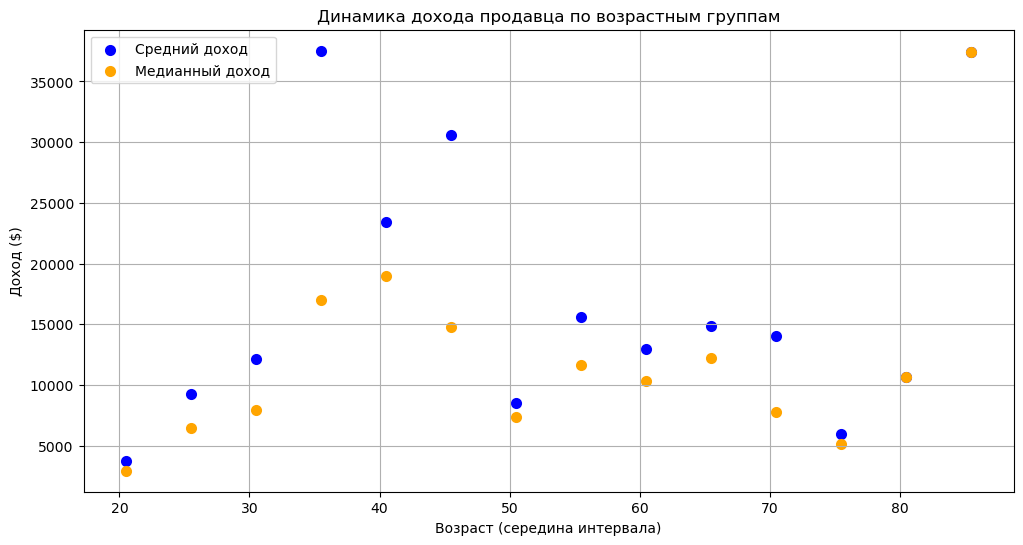

In [29]:
seller_realrinc_by_age['age_mid'] = seller_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(12, 6))
plt.scatter(seller_realrinc_by_age['age_mid'], seller_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(seller_realrinc_by_age['age_mid'], seller_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода продавца по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();


Продавцы имеют не самый высокий стартовый доход, однако дальше наблюдается немалый рост их доходности, а в возрасте 33-38 лет происходит неожиданно резкий скачок до пикового состояния - средний доход составляет 37 526 тыс. долларов, а медианный при этом - лишь 17 025. Такой откровенно гигантский разрыв в значениях является признаком высокооплачиваемых "выбросов" - управляющих, владельцев крупных бизнесов, топ-менеджеров, поскольку они также входят в эту категорию. После 48 лет доход резко падает, после чего выходит на плато. Аномально высокое значение достигается для возрастной группы 83-88 лет - скорее всего, в этом интервале находится 1-2 человека с высокими пенсиями/активами, что и искажает общую картину.

Теперь объединим все профессии, связанные с IT-сферой, и попробуем найти возраст, на который приходится наибольший доход, для них. Сделаем отбор таких профессий:

In [30]:
it_codes = [1005, 1006, 1007, 1010, 1020, 1021, 1030, 1040, 1050, 1060, 1105, 1106]
df_it = df[df['occ'].isin(it_codes)].copy()
df_it

,age,occ,realrinc,year,age_group
36,84.0,1050.0,2331.0,2010,"[83, 88)"
48,45.0,1050.0,34965.0,2010,"[43, 48)"
52,49.0,1020.0,42735.0,2010,"[48, 53)"
115,59.0,1105.0,51800.0,2010,"[58, 63)"
189,37.0,1106.0,42735.0,2010,"[33, 38)"
...,...,...,...,...,...
18847,29.0,1020.0,33742.5,2022,"[28, 33)"
18942,50.0,1020.0,65440.0,2022,"[48, 53)"
19081,66.0,1010.0,33742.5,2022,"[63, 68)"
19086,63.0,1050.0,11247.5,2022,"[63, 68)"


Найдем средний и медианный доход по возрастным группам для IT-специалистов:

In [31]:
it_stats = df_it.groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
it_stats

,age_group,mean,median
0,"[18, 23)",8432.250000,8432.75
1,"[23, 28)",23293.868421,23310.00
2,"[28, 33)",40332.882343,33408.75
3,"[33, 38)",42131.550167,34965.00
4,"[38, 43)",39508.590021,32501.25
5,"[43, 48)",61963.666412,43600.00
6,"[48, 53)",55206.785870,43167.50
7,"[53, 58)",42347.878879,37496.25
8,"[58, 63)",44259.417003,42735.00
9,"[63, 68)",37086.805556,41311.25


Визуализируем результат:

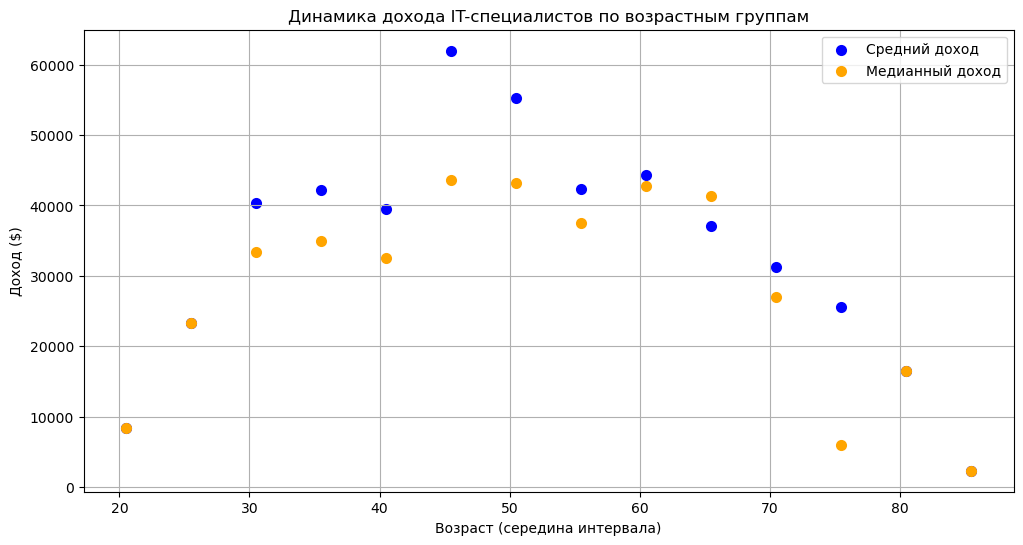

In [32]:
it_stats['age_mid'] = it_stats['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(12, 6))
plt.scatter(it_stats['age_mid'], it_stats['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(it_stats['age_mid'], it_stats['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода IT-специалистов по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();

IT-специалисты имеют наиболее высокий стартовый доход среди всех рассмотренных нами профессий, после чего следует экспоненциальный рост вплоть до 33-летнего возраста. Затем показатели стабилизируются и к 43-48 годам достигают своего пика со средним доходом 61 963 тыс. долларов и медианным доходом 43 600 тыс. долларов. Как и в случае с продавцами, большой разрыв между этими показателями указывает на наличие высокооплачиваемых узких специалистов и топ-менеджеров, зарабатывающих значительно больше рядовых сотрудников. Дальнейшее падение уровня доходов является плавным, при этом размер дохода остается высоким на протяжении всей карьеры, обеспечивая более мягкий выход из нее - относительно резкий спад происходит только к 73-78 годам.

Из матрицы корреляций видно, что на доход влияет как сама профессия, так и возраст респондента. Визуализируем ниже общий график зависимости дохода от возраста для всех профессий.

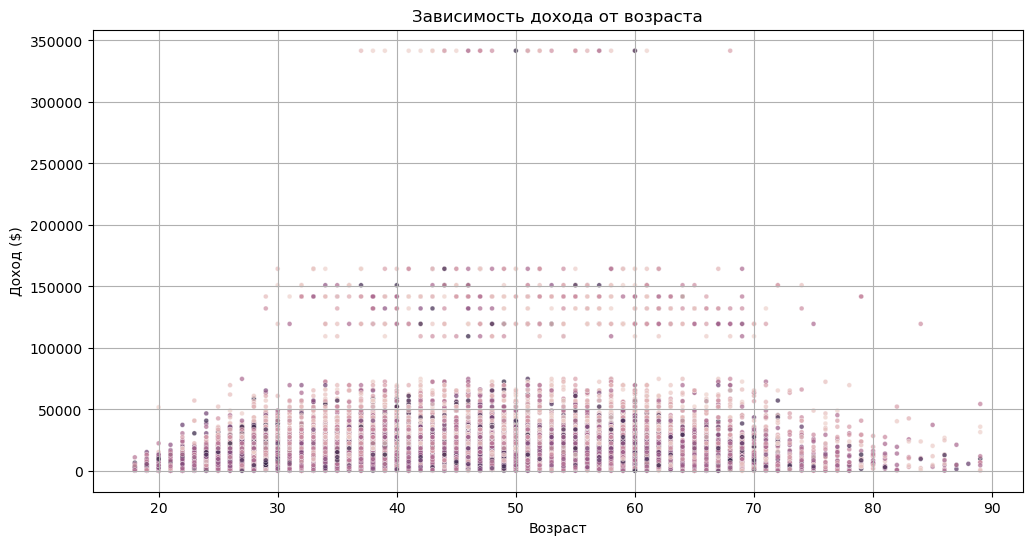

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.age, y=df.realrinc, s=12, alpha=0.7, hue=df.occ).legend().remove()
plt.grid()
plt.xlabel("Возраст")
plt.ylabel('Доход ($)')
plt.title('Зависимость дохода от возраста')
plt.show()

Как ранее и было сказано, сначала доход человека растет, в независимости от профессии, далее выходит на постояный уровень, после чего идет на спад в связи с выходом на пенсию. Построим и сравним 2 модели: доход ~ возраст + возраст в квадрате и доход ~ возраст + возраст в квадрате + профессия. Поскольку возраст показывает зависимость, похожую на параболлическую, а не линейную добавим к моделям возраст в квадрате.

In [34]:
import statsmodels.api as sm
df['age_squared'] = df['age'] * df['age']

X = df[['age', 'age_squared']]
y = df.realrinc
X = sm.add_constant(X)
model1 = sm.OLS(y, X.astype(float)).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     329.1
Date:                Wed, 28 May 2025   Prob (F-statistic):          1.49e-139
Time:                        00:20:25   Log-Likelihood:            -1.3056e+05
No. Observations:               11094   AIC:                         2.611e+05
Df Residuals:                   11091   BIC:                         2.611e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.051e+04   2714.660    -14.922      

In [35]:
df = pd.get_dummies(df, columns=['occ'])

In [36]:
X = df.drop(labels=['age_group', 'realrinc', 'year'], axis=1)
y = df.realrinc
X = sm.add_constant(X)
model2 = sm.OLS(y, X.astype(float)).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.542
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        00:20:27   Log-Likelihood:            -1.2890e+05
No. Observations:               11094   AIC:                         2.588e+05
Df Residuals:                   10616   BIC:                         2.623e+05
Df Model:                         477                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.225e+04   2583.008     -8.613      

Таким образом, мы получили две модели.
1. Ограниченная модель доход ~ возраст. Согласно протоколу, модель бесполезная, поскольку она не объясняет никак дисперсии зависимой переменной (R-squared практически 0). С другой стороны, F-статистика с p-value близкому к нулю говорит о статистической значимости модели. Следует отметить, что оба коэффициента - intercept и при age - статистически значимы, так как значения их p-value равны нулю. Данная картина подталкивает нас на расширение модели.
2. Расширенная модель доход ~ возраст + профессия. Данная модель показывает себя лучше ограниченной - p-value F-статистики равно нулю, а R-squared близко к 0.3. Константа в данном случае также остается значимой, как и переменная возраста, а вот некоторые признаки, образованные one-hot кодированием не являются статистически значимыми, потому что p-value > 0.05.

Визуализируем ниже обе модели

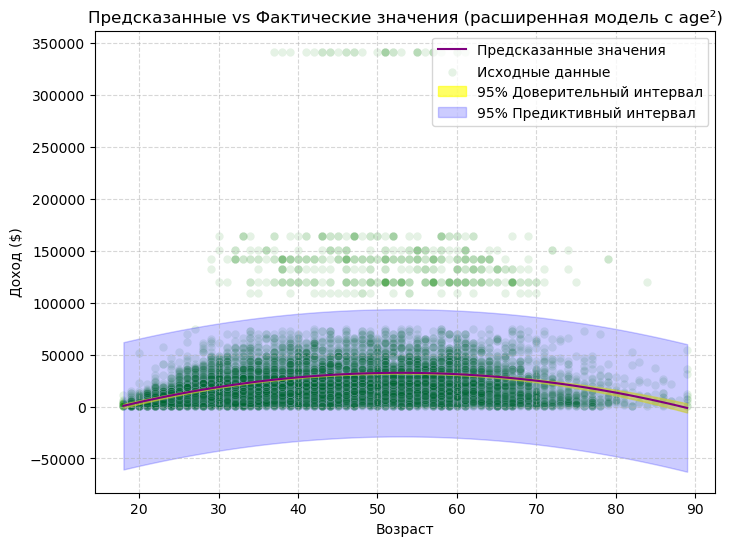

In [37]:
# Создаем новые данные
x_pred = np.linspace(df['age'].min(), df['age'].max(), 100)
x_pred_sq = x_pred ** 2

# Объединяем в DataFrame
X_pred = pd.DataFrame({
    'const': 1,
    'age': x_pred,
    'age_squared': x_pred_sq
})

# Получаем предсказания
pred = model1.get_prediction(X_pred)
pred_df = pred.summary_frame(alpha=0.05)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(x_pred, pred_df['mean'], color='purple', label='Предсказанные значения')
sns.scatterplot(x=df['age'], y=df['realrinc'], color='green', alpha=0.1, label='Исходные данные')

# Доверительный интервал
plt.fill_between(x_pred, pred_df['mean_ci_lower'], pred_df['mean_ci_upper'], color='yellow', alpha=0.6, label='95% Доверительный интервал')

# Предсказательный интервал
plt.fill_between(x_pred, pred_df['obs_ci_lower'], pred_df['obs_ci_upper'], color='blue', alpha=0.2, label='95% Предиктивный интервал')

plt.title('Предсказанные vs Фактические значения (расширенная модель с age²)')
plt.xlabel('Возраст')
plt.ylabel('Доход ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

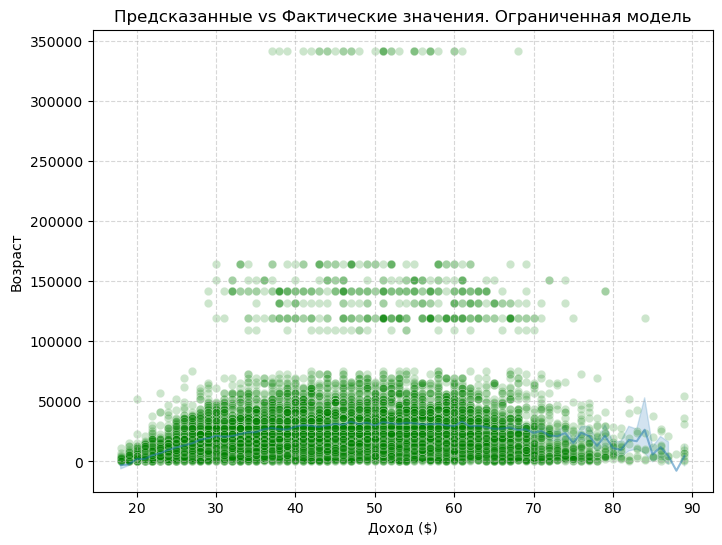

In [38]:
plt.figure(figsize=(8, 6))
df['occ'] = df[X.columns[2:]].idxmax(axis=1)
df['occ'] = df['occ'].str.replace('occ_', '')
sns.lineplot(data=df, x=df.age, y=model2.fittedvalues, alpha=0.5, hue='occ').legend().remove()
sns.scatterplot(y=df.realrinc, x=df.age, color='green', alpha=0.2).legend().remove()

plt.title('Предсказанные vs Фактические значения. Ограниченная модель')
plt.xlabel('Доход ($)')
plt.ylabel('Возраст')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Выводы

1. Распределение возраста похоже на нормальное с ожидаемым диапазоном (18-89 лет), но с дополнительной правосторонней асимметрией, что характерно для социальных и демографических данных.
2. Распределение дохода имеет ярко выраженную правостороннюю асимметрию и значительный разброс значений, что довольно-таки типично для доходов, поскольку в подавляющем большинстве сфер присутствует непропорциональность в распределении доходов и прибыли.
3. Люди в среднем достигают наибольших доходов в возрасте 48-53 лет; при этом в возрасте 43-63 лет наблюдается плато с высокими доходами людей.
4. Все профессии демонстрируют рост доходов в начале карьеры (18–35 лет), также видна явная тенденция к их снижению после 60–65 лет.
5. Наибольший разрыв между средними и медианными доходами наблюдается в IT и медицине (из-за высокооплачиваемых специалистов).
7. IT и медики сохраняют высокие доходы даже после 50 лет, продавцы и учителя сильнее зависят от возраста - их доходы падают раньше.
8. В топ-10 наиболее распространенных профессий вошли: учитель, медицинский работник, продавец, повар, секретарь, грузчик, сотрудник службы поддержки клиентов, уборщик, водитель, кассир.
9. Что возраст, что профессия являются статистически значимыми признаками для построения модели линейной регрессии.
10. Неограниченная модель регрессии пригодна для минимального прогноза, пусть и имеет низкий R-squared, тем не менее, модель статистически значима и позволяет предсказывать доход в отличие от ограниченной.

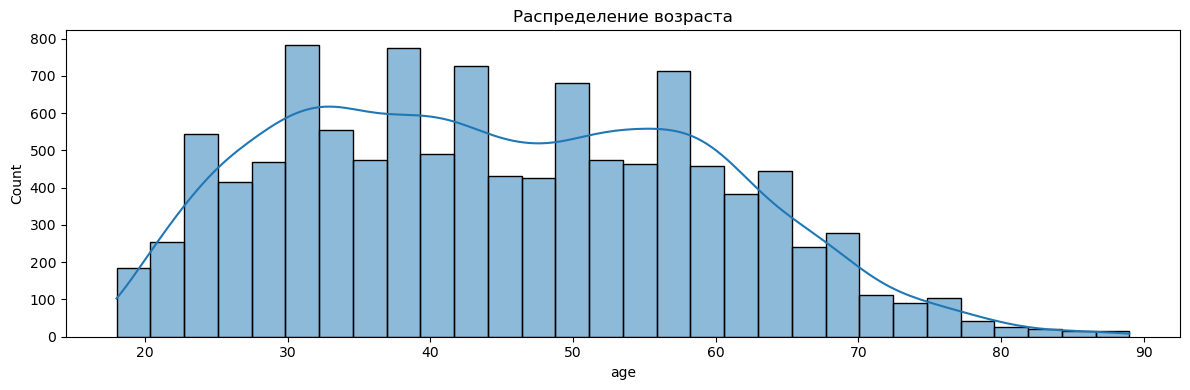

In [39]:
plt.figure(figsize=(12, 4))

# Распределение возраста
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возраста')

plt.tight_layout()
plt.show();

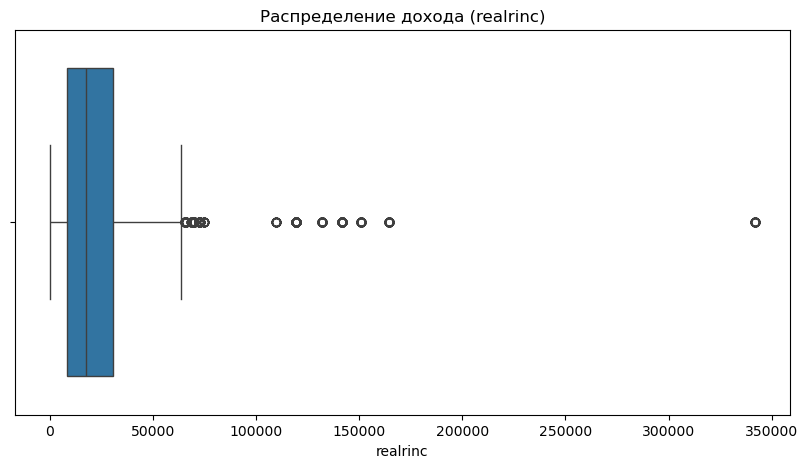

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['realrinc'])
plt.title('Распределение дохода (realrinc)')
plt.show()

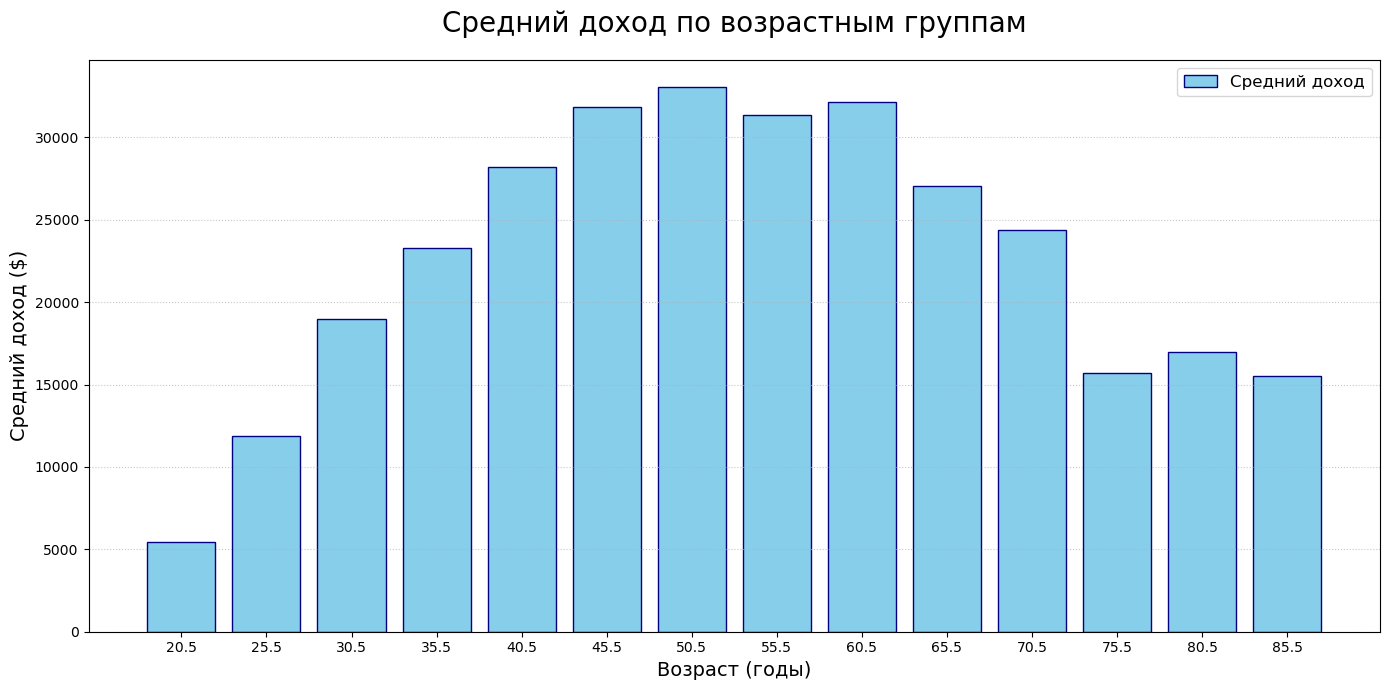

In [41]:
plt.figure(figsize=(14, 7))

bars = plt.bar(
    x=realrinc_by_age['age_mid'], height=realrinc_by_age['mean'], width=4,
    color='skyblue', edgecolor='navy', linewidth=1, label='Средний доход'
)

plt.title('Средний доход по возрастным группам', fontsize=20, pad=20)
plt.xlabel('Возраст (годы)', fontsize=14)
plt.ylabel('Средний доход ($)', fontsize=14)
plt.xticks(realrinc_by_age['age_mid'])
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

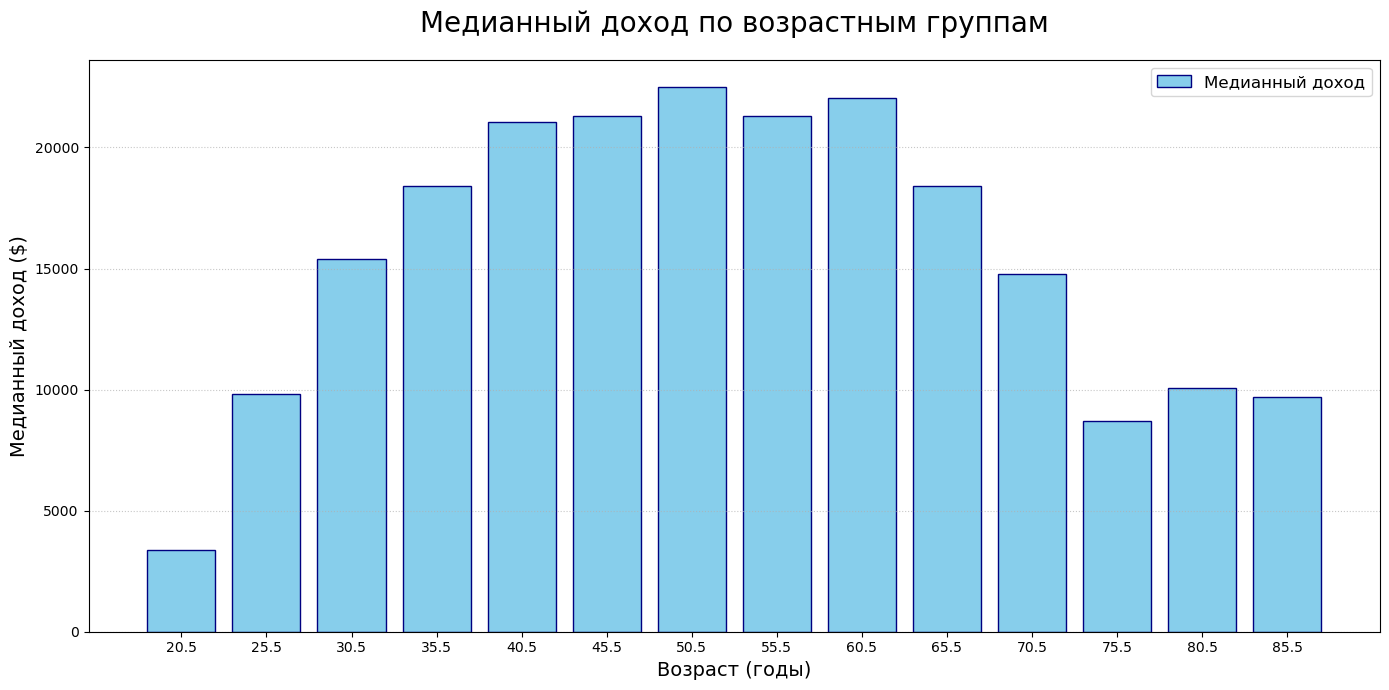

In [42]:
plt.figure(figsize=(14, 7))

bars = plt.bar(
    x=realrinc_by_age['age_mid'], height=realrinc_by_age['median'], width=4,
    color='skyblue', edgecolor='navy', linewidth=1, label='Медианный доход'
)

plt.title('Медианный доход по возрастным группам', fontsize=20, pad=20)
plt.xlabel('Возраст (годы)', fontsize=14)
plt.ylabel('Медианный доход ($)', fontsize=14)
plt.xticks(realrinc_by_age['age_mid'])
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

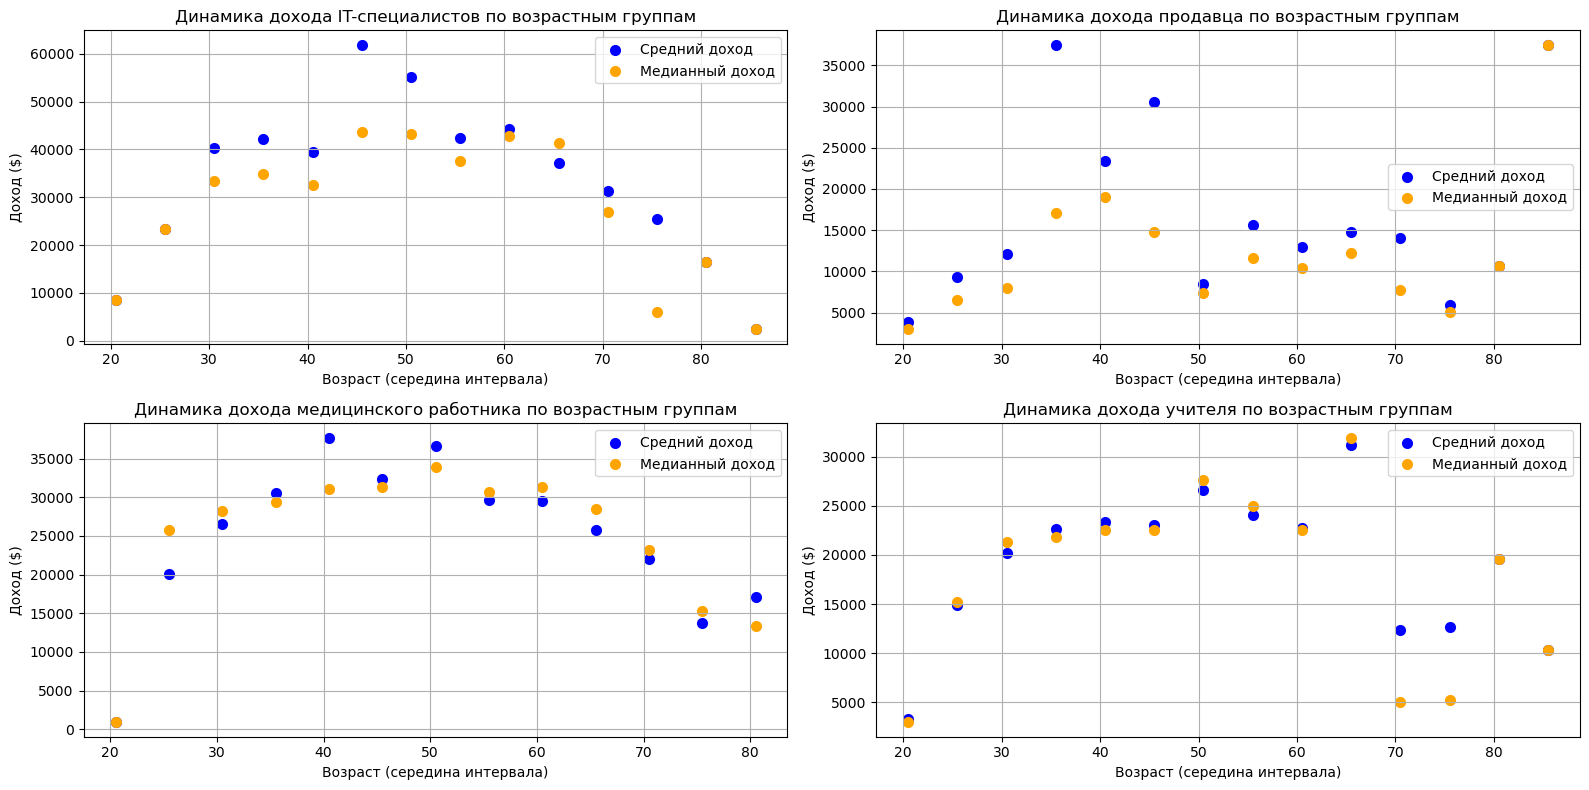

In [43]:
it_stats['age_mid'] = it_stats['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.scatter(it_stats['age_mid'], it_stats['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(it_stats['age_mid'], it_stats['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода IT-специалистов по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
seller_realrinc_by_age['age_mid'] = seller_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.subplot(2, 2, 2)
plt.scatter(seller_realrinc_by_age['age_mid'], seller_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(seller_realrinc_by_age['age_mid'], seller_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода продавца по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
medic_realrinc_by_age['age_mid'] = medic_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.subplot(2, 2, 3)
plt.scatter(medic_realrinc_by_age['age_mid'], medic_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(medic_realrinc_by_age['age_mid'], medic_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода медицинского работника по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
teahcer_realrinc_by_age['age_mid'] = teahcer_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.subplot(2, 2, 4)
plt.scatter(teahcer_realrinc_by_age['age_mid'], teahcer_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(teahcer_realrinc_by_age['age_mid'], teahcer_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода учителя по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

In [44]:
# Наиболее популярные профессии
print("\nТоп-10 самых распространенных профессий:")
print(df['occ'].value_counts().head(10))


Топ-10 самых распространенных профессий:
occ
age_squared    11094
Name: count, dtype: int64


In [45]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.542
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        00:20:44   Log-Likelihood:            -1.2890e+05
No. Observations:               11094   AIC:                         2.588e+05
Df Residuals:                   10616   BIC:                         2.623e+05
Df Model:                         477                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.225e+04   2583.008     -8.613      